In [1]:
#Correr esta celda si estas en collab para instalar Pennylane

!pip install pennylane

# Pennylane

Pennylane es una libreria de programación de cómputo cuántico. Lo interesante de Pennylane, es que nos da algunas opciones que qiskit no tiene. Posteriormente con el uso de algoritmos cuánticos variacionales se vuelve una herramiente sumamente util, porque lo que permite, es que realicemos Cómputo cuántico Diferenciable.


Contrastemos

En Qiskit, definimos el circuito, medimos, y ahí se acaba la cosa. Qiskit nos va a servir mucho para algoritmos sencillos, pero Pennylane nos promete algo

Construir algoritmos cuánticos que puedan depender de funciones diferenciables.


En Pennylane, el eslabón principal con el cual se trabaja, son los QNodes o Nodos cuánticos, que son funciones que ejecutan algoritmos cuánticos en función de valores. Esto hace que puedan ser diferenciables

In [1]:
# la forma típica e invocar a pennylane es como qml

import pennylane as qml
import numpy as np

In [3]:
#Para trabajar, necesitamos un dispositivo
#Por default, usaremos el dispositivo dev

dev = qml.device('default.qubit', wires=2)  #wires=número de qubits

In [4]:
#Igual podemos tener devices que nombren a cada una de sus wires:

#dev = qml.device('default.qubit', wires=['q1', 'q2'])

In [4]:
#Desglosemos juntos esto. Veamos como Pennylane adquiere la naturaleza de
#función desde el inicio, dependiendo de x y y

def my_quantum_function(x, y):
    qml.RY(x, wires=0)  #Las Wires son los qubits
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.Z(wires=1))  #Especificamos sobre que base medimos y  que qubit tambien

#Si nuestro device es de entradas nombradas, podemos asignar acada entrada el valor que mencionemos

#def my_quantum_function(x, y):
#  qml.RZ(x, wires='q1')
#  qml.CNOT(wires=['q1', 'q2'])
#  qml.RY(y, wires='q2')
#  return qml.expval(qml.Z(wires='q2'))#

Este código presentado anteriormente es una función cuántica. Pennylane trabaja en su mayoría con funciones cuánticas. Para entender que ocurrió anteriormente, basta con leer el código con el cual trabajamos:

Recordemos que

$$
R_X(\theta) =
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
R_Y(\theta) =
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
R_Z(\theta) =
\begin{pmatrix}
e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}}
\end{pmatrix}
$$

Lo que hizo la función anterior es, aplicames la rotación en Z con un angulo theta=x al estado inicial en el qubit 0, posteriormente un CNOT entre los qubits 0 y 1, y para finaliar una rotación en y en el qubit 1. Lo interesante, es que al ser una función, nosotros controlamos el valor asignado a las rotaciones con las que trabajemos

Piensalo de esta forma

El device es la maquina con la que trabajas

La quantum function es la receta con la que haras trabajar la máquina

¿Entonces que hacemos ahora?


Exactamente, las juntamos

In [7]:
#Fabricamos el nodo con el que trabajamos juntando la función, y el device

qnode = qml.QNode(my_quantum_function, dev)

#Y en función de lo que necesitemos, recuperaremos diversa información

qnode(1.0, 0.5)  #Puedes jugar con los valores como te plazca

np.float64(0.4741598817790378)

El Qnode nos devuelve la información que nosotros le pidamos al sistema, en función de lo que necesitemos y de los valores que le asignemos.

Esto es la magia de Pennylane, todo se puede trabajar como si de una función se tratara

Una forma mas común de trabajar los circuitos es la siguiente:

In [10]:
@qml.qnode(dev)  #El @ funciona como conector para fabricar el qnode
def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.Z(wires=1))

my_quantum_function(0, 1.3)

np.float64(0.2674988286245875)

In [ ]:
dev = qml.device('default.qubit', wires = qubits, shots = None)

@qml.qnode(dev)
def my_quantum_function(x, y):
    #Aquí colocas el circuito con el cual vas a trabajar
    
    return qml.expval(qml.Z(wires=qubit))

Para visualizar los circuitos, podemos aplicar circuitos draw similares a los que vemos en qiskit

In [11]:
@qml.qnode(dev)
def qc(x):
    qml.Hadamard(wires=0)
    qml.RX(x, wires=0)
    return qml.expval(qml.Z(0))



In [13]:
qml.draw(qc)(1) #el 0.5 evita que se confunda con una función

'0: ──H──RX(1.00)─┤  <Z>'

(<Figure size 500x200 with 1 Axes>, <Axes: >)

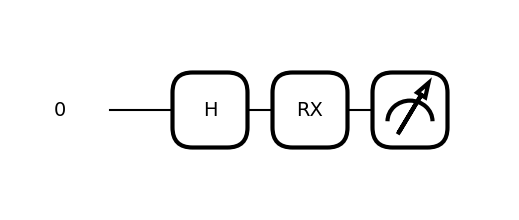

In [14]:
qml.draw_mpl(qc)(0.5) #para mostrarlo de forma mas elegante

Tarea 3: Crea un circuito sencillo en pennylane y busca distintos tipos de draw. Y me expliques cual es tu favorito y por qué.

Antes de avanzar, hay que hacer un parentesis conceptual que no he explicado antes: Los Valores esperados de un Operador

En mecánica cuántica, tu no observas algo, tu visualizas el efecto de un valor físico del estado en un medidor. Las cantidades físicas se les denomina "Observables" y son operadores Hermitianos que representan una cantidad física. En computación cuántica, cuando tu mides, tu lo que haces en realidad es correr el observable $\hat{Z}$ sobre el sistema. El valor esperado de un sistema esta dado por:

\begin{equation}
    \langle\psi|\hat{Z}|\psi\rangle
\end{equation}

y dado que por el teorema de descomposición espectral, todo operador hermitiano se puede ver como la suma de los proyectores de sus eigenvectores multiplicados con sus eigenvalores

\begin{equation}
    \hat{Z}=\sum_i \lambda_i |\lambda_i\rangle\langle\lambda_i|
\end{equation}

Con esto en mente

Tarea 4: Demostrar que los eigenvalores y eigenvectores de $\hat{Z}$ son +1 con $|0\rangle$ y -1 con $|1\rangle$ y con ayuda del teorema de descomposición espectral, demostrar que el valor esperado de Z es la diferencia entre las probabilidades de medir 0 menos las de medir 1

Y lo que hacemos en pennylane con el return qml.expval(qml.PauliZ(Qubit)) es precisamente encontrar la diferencia entre estas 2 probabilidades y evaluarlo como valor. Este valor es de hecho, diferenciable, por lo cual puedes despues encontrar derivadas de esto

Para trabajar las mediciones, los return son clave. Lo que tu coloques en el return de tu función, será lo que recuperará Pennylane en su medición, lo cual te va a permitir trabajar con el valor qe tu necesites o mas te convenga

Eso te permite trabajar tanto con valores fijos, como con valores relacionados a shots, similar a Qiskit y su Aer. Para ello, el dev debe de cambiar, a incluirlos

In [33]:
dev = qml.device("default.qubit", wires=2, shots=1000)  #Incluimos shots para que el dispositivo ejecute el circuito varias veces y así obtener una distribución de resultados

c:\Users\the_b\miniconda3\envs\pennylane-env\Lib\site-packages\pennylane\devices\device_api.py:201: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


La cantidad de returns con los que trabajemos, nos darán los valores que nosotros queramos y deseemos para que podamos trabajar con ellos

In [34]:
@qml.qnode(dev)
def bell_circuit():  #Al ser un circuito de bell, no necesitamos parámetros de entrada
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    
    return (
        qml.expval(qml.PauliZ(0)),          # ⟨Z0⟩
        qml.expval(qml.PauliZ(1)),          # ⟨Z1⟩
        qml.expval(qml.PauliZ(0) @ qml.PauliZ(1)),  # ⟨Z0 Z1⟩
        qml.probs(wires=[0,1]),             # distribución completa
        qml.sample(qml.PauliZ(0)),          # muestras individuales
        qml.counts(wires=[0,1]),             # conteos conjuntos                   
    )


In [35]:
results = bell_circuit()  #Al ser una tupla, podemos desempaquetar cada resultado
print(type(results))
print(len(results))

<class 'tuple'>
6


In [ ]:
exp_z0, exp_z1, exp_z0z1, probs, samples, counts = bell_circuit()

print(exp_z0)  #Pueden jugar con los valores a los cuales quieran recuperar

0.032


Los objetos que recuperemos van a depender del Device que estemos trabajando. Anteriormente usamos un device de shots, que recupera los valores usando las pruebas que se realizan (lo cual genera ruido)

Si queremos un resultado analítico, no uses shots

In [42]:
dev = qml.device("default.qubit", wires=2)

In [43]:
@qml.qnode(dev)
def bell_circuit():  
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    
    return (
        qml.expval(qml.PauliZ(0)),          # ⟨Z0⟩
        qml.expval(qml.PauliZ(1)),          # ⟨Z1⟩
        qml.expval(qml.PauliZ(0) @ qml.PauliZ(1)),  # ⟨Z0 Z1⟩
        qml.state(),                        # estado completo
        qml.probs(wires=[0,1]),             # distribución completa            
    )

In [45]:
results = bell_circuit()

exp_z0, exp_z1, exp_z0z1, state, probs = results

print(state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


Vamos a aprovechar el poder de Pennylane y visualicemos un circuito que podamos nosotros medir

Forma matricial de RX(θ)
$$
R_X(\theta)=
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right)\\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

Estado |0> en forma vector columna
$$
|0\rangle =
\begin{pmatrix}
1\\
0
\end{pmatrix}
$$

Aplicación de RX(θ) sobre |0>
$$
R_X(\theta)\,|0\rangle
=
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right)\\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
\begin{pmatrix}
1\\
0
\end{pmatrix}
$$

Multiplicación explícita
$$
=
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right)\cdot 1 + \left(-i\sin\left(\frac{\theta}{2}\right)\right)\cdot 0\\[6pt]
\left(-i\sin\left(\frac{\theta}{2}\right)\right)\cdot 1 + \cos\left(\frac{\theta}{2}\right)\cdot 0
\end{pmatrix}
=
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right)\\
-i\sin\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

Resultado en notación de Dirac
$$
R_X(\theta)\,|0\rangle
=
\cos\left(\frac{\theta}{2}\right)|0\rangle
-i\sin\left(\frac{\theta}{2}\right)|1\rangle
$$

Probabilidades en base computacional
$$
P(0)=\left|\cos\left(\frac{\theta}{2}\right)\right|^2=\cos^2\left(\frac{\theta}{2}\right),
\qquad
P(1)=\left|-i\sin\left(\frac{\theta}{2}\right)\right|^2=\sin^2\left(\frac{\theta}{2}\right)
$$

Valor esperado de Z
$$
\langle Z\rangle = P(0)-P(1)
= \cos^2\left(\frac{\theta}{2}\right)-\sin^2\left(\frac{\theta}{2}\right)
= \cos(\theta)
$$

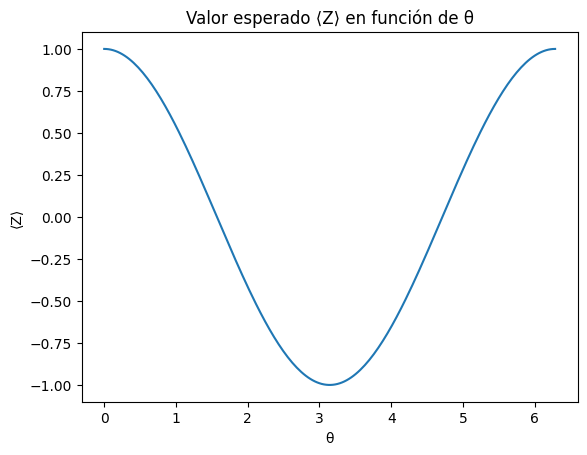

In [4]:
import matplotlib.pyplot as plt

# Device analítico (sin shots para obtener valor exacto)
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0)) #Valor esperado de Z después de rotar con RX(θ)

# Generamos valores de theta
thetas = np.linspace(0, 2*np.pi, 200)

# Evaluamos la función
values = [circuit(t) for t in thetas]

plt.figure()
plt.plot(thetas, values)
plt.xlabel("θ")
plt.ylabel("⟨Z⟩")
plt.title("Valor esperado ⟨Z⟩ en función de θ")
plt.show()





Tarea 5: Repitan el desarrollo matemático que hicimos para RX en las matrices RY y RZ, y luego generen el circuito en Pennylane, de return coloquen el valor esperado de de la matriz de Paulli Z, grafiquenlo en Matplotlib y argumenten si lo que graficaron se corresponde a lo que el circuito que predijeron iba a dar. Contesta las siguientes preguntas usando tu imaginación: 

Si podemos fabricar funciones basadas en circuitos cuánticos, ¿podrían existir formas de derivar dichas funciones para obtener utilidad de las mismas?

¿Que nuevos horizontes el trabajar con derivadas de funciones generadas por medio de circuitos cuánticos podriamos llegar a alcanzar?

Investiga algun algoritmo que se beneficie de ello y describe brevemente como lo hacen, e identifica que posibles avances para la humanidad podrían traer algoritmos de esta naturaleza